# 1 Simple Linear Regression

**Example** As shown below, there are some data $(X_i,Y_i)$ where $X_i,Y_i\in\mathbb R$ and it has a linear pattern. We can fit it with simple linear regression. 

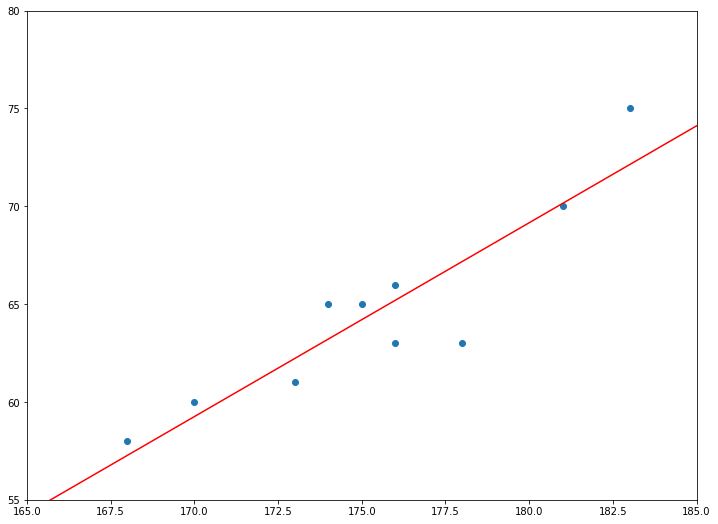

In [11]:
import numpy as np 
from matplotlib import pyplot as plt 
height = np.array([170, 174, 175, 176, 173, 183, 178, 176, 168, 181])
weight = np.array([60, 65, 65, 66, 61, 75, 63, 63, 58, 70])
fit = np.polyfit(height, weight, deg = 1)
fit_x = np.linspace(165, 185, 500)
plt.figure(figsize = (12, 9))
plt.scatter(height, weight)
plt.plot(fit_x, fit[0]*fit_x + fit[1], c='r')
plt.xlim(165, 185)
plt.ylim(55, 80)
plt.show()

## Model 

Define a linear model by $Y = \beta X  + \alpha + \epsilon $ where 


$Y$ is the dependent variable (response) and $X$ is the independent variable (predictor) and $\epsilon $ is the random error. The parameter $\beta$ is called slope while $\alpha$ is the intercept. 

Also, we require $\mathbb E(\epsilon) = 0$ or $\mathbb E(\epsilon |X_i) = 0$. And we denote $\sigma^2 = {\rm Var}(\epsilon)$ or $\sigma^2 = {\rm Var}(\epsilon_i | X_i)$. Therefore, for fixed $X_i$, 
$$\mathbb E(Y_i|X_i) = \beta X_i + \alpha \quad{\rm and}\quad {\rm Var}(Y_i|X_i) = \sigma^2$$

We call $r(x) =\beta x+ \alpha$ the regression line. 

E.g. Linear models can fit correlated Gaussian variables. 

### Least Squares Estimator

We can estimate the value of $\alpha$ and $\beta$ and even $\epsilon$ with observations. The estimtated values determine a regression line, which we call the fitted regression line. 

Usually, we wish to minimize $\mathcal L = \sum |Y_i - \hat{Y_i}|^2 = \sum |Y_i - \hat \beta X_i - \hat \alpha|^2$, so that 
$$\left\{\begin{array}{ll}0 = \dfrac{\partial \mathcal L}{\partial \hat \alpha} = - 2\sum (Y_i - \hat \beta X_i - \hat \alpha )
\\ 0 = \dfrac{\partial \mathcal L}{\partial \hat \beta} =-2\sum X_i (Y_i - \hat \beta X_i - \hat \alpha ) \end{array}\right.$$

From the first equation we yield $\hat \alpha = \bar Y - \hat \beta \bar X$. Plug it into the second we learn 
$$n\bar X\bar Y - n \hat \beta (\bar X)^2=\sum X_iY_i - \hat \beta\sum X_i^2$$
And thus 
$$\hat \beta = \frac{\overline{XY} - \bar X \bar Y}{(\bar X)^2 - \overline {X^2}} = \frac{{\rm Cov}(X,Y)}{{\rm Var}(X)}.$$

Here 
$$\begin{aligned}
   {\rm Cov}(X,Y) &=\sum (X_i-\bar X)(Y_i - \bar Y)= \sum X_iY_i -\frac1n \left(\sum X_i\right)\left(\sum Y_i\right)
\\ {\rm Var}(X) =  {\rm Cov}(X,X)&=\sum (X_i-\bar X)^2= \sum X_i^2 - \frac 1n\left(\sum X_i\right)^2.
\end{aligned}$$

### Properties

If we substitude $Y_i = \beta X_i + \alpha + \epsilon_i$, then 
$$\hat \beta = \frac{\sum (X_i - \bar X)(Y_i - \bar Y)}{{\rm Var}(X)}= \frac{\sum (X_i - \bar X)(\beta X_i  +\epsilon_i + \alpha- \bar Y)}{{\rm Var}(X)}= \frac{\sum (X_i - \bar X)(\beta X_i  +\epsilon_i )}{{\rm Var}(X)}=\beta +\sum \frac{X_i - \bar X}{{\rm Var}(X)}\epsilon_i $$
and 
$$\hat \alpha = \beta \bar X + \alpha + \bar \epsilon -\hat  \beta \bar X
=\alpha +\sum \left(\frac1n  - \frac{X_i - \bar X}{{\rm Var}(X)}\bar X\right)\epsilon_i.$$

Recall that the randomness is on $\epsilon_i$ and $\epsilon_i$ are independent with mean zero and variance $\sigma^2$. Therefore, $\hat \beta $ and $\hat \alpha$ are unbiased estimator. The variance is given by 
$$\begin{aligned}{\rm Var}(\hat \beta) & = \sigma^2 \sum \left(\frac{X_i - \bar X}{{\rm Var}(X)}\right)^2 =\frac{\sigma^2}{{\rm Var}(X)}
\\ {\rm Var}(\hat \alpha) &= \sigma^2 \sum \left(\frac{1}{n^2}  - \frac 2n \frac{X_i - \bar X}{{\rm Var}(X)} \bar X+ \left(\frac{X_i - \bar X}{{\rm Var}(X)}\bar X\right)^2\right)=\left(\frac{1}{n}+\frac{(\bar X)^2}{{\rm Var}(X)}\right)\sigma^2
\\ {\rm Cov}(\hat \alpha, \hat \beta) &=\sigma^2 \sum   \left(\frac1n  - \frac{X_i - \bar X}{{\rm Var}(X)}\bar X\right)\frac{X_i - \bar X}{{\rm Var}(X)} = -\frac{\bar X}{{\rm Var}(X)}\sigma^2
\\ {\rm Var}(\hat{Y_i}) &= {\rm Var}\left(\hat \alpha + \hat \beta X_i\right)
= \left(\frac{1}{n^2}+\frac{(X_i - \bar X)^2}{{\rm Var}(X)}\right)\sigma^2 \\
{\rm Var}(\hat{Y_i} - Y_i)&={\rm Var}(\hat{Y_i})+\sigma^2 - 2{\rm Cov}(\hat{Y_i},\epsilon_i)
= \left(\frac{(n-1)^2}{n^2}-\frac{(X_i - \bar X)^2}{{\rm Var}(X)}  \right)\sigma^2 
\end{aligned}$$


### Gauss-Markov Theorem

**Theorem** The simple linear regression by least squares is the best linear unbiased estimator (BLUE). 

**Proof** Suppose $\tilde \beta$ is BLUE. Then it must be linear with respect to $Y$, say, $\tilde \beta = \sum \lambda_i Y_i$. Since it should be unbiased, we require $\mathbb E\tilde\beta = \beta$, which implies $\sum \left(\lambda_i \beta X_i + \lambda_i \alpha \right) \equiv \beta$. Thus $\sum \lambda_i X_i = 1$ and $\sum \lambda_i = 0$. Lastly, to minimize the variance of $\tilde \beta$, it is equivalent to minimizing $\sum \lambda_i^2$.

This is certainly convex with Slater condition and we use the Lagrangian dual to derive the result. 
$$\begin{aligned}\inf \{\sum \lambda_i^2 :\ \sum \lambda_i X_i = 1,\ \sum\lambda_i = 0\}
&=\sup_\mu  \inf_\lambda  \{\sum \lambda_i^2 + \mu_1(\sum \lambda_i X_i - 1) + \mu_2 \sum\lambda_i\}\\
&= \sup_\mu \{-\mu_1-\sum \frac{(\mu_1 X_i+\mu_2)^2}{4}\}\end{aligned}.$$

It reaches supremum when $\mu_2 = -\mu_1 \bar X$ and $\mu_1 = -\dfrac{2}{{\rm Var}(X)}$. Hence $\lambda_i = -\dfrac{\mu_1X_i+\mu_2}{2}=\dfrac{X_i - \bar X}{{\rm Var}(X)} $ and 
$$\tilde \beta = \sum \frac{X_i - \bar X}{{\rm Var}(X)}Y_i  =  \sum \frac{X_i - \bar X}{{\rm Var}(X)}(Y_i - \bar Y) = \hat \beta,$$
which is exactly the solution to least squares. 

Similarly one can prove $\hat \alpha$ is also BLUE.



### Maximum Likelihood Estimator

**Theorem** If $\epsilon_i\sim N(0,\sigma^2)$ are independent, then the simple linear regression by least squares is the maximum likelihoood estimator (MLE). 

**Proof** As randomness falls on $\epsilon_i$, we learn $Y$ has joint multivariate normal distribution, $Y\sim N(\beta X+\alpha, \sigma^2 I)$. The log likelihoood is given by 
$$\log L = \log \frac{1}{\sqrt {2\pi }^n \sigma^n} -\frac{1}{2\sigma^2} \left\Vert Y - \beta X - \alpha\right\Vert^2.$$

Given fixed $\sigma$, then $\hat \alpha,\hat \beta$ minimize the distance $\left\Vert Y - \beta X - \alpha\right\Vert^2$, which corresponds to the least squares presented in the linear regression. 

Moreover, one can estimate $\sigma^2$ by MLE. Note that 
$$0 = \frac{\partial \log L}{\partial \sigma} =\frac{1}{\sigma^3} \left\Vert Y - \hat \beta X - \hat \alpha\right\Vert^2-\frac {n}{\sigma}\quad \Rightarrow \quad \hat\sigma_{MLE}^2 = \frac 1n\left\Vert Y -\hat  \beta X - \hat \alpha\right\Vert^2.  $$

And 
$$\mathbb E\hat \sigma_{MLE}^2=\frac 1n \sum \mathbb E\left(Y_i - \hat \beta X_i -\hat \alpha \right)^2
=\frac 1n \sum  \left(\frac{(n-1)^2}{n^2}-\frac{(X_i - \bar X)^2}{{\rm Var}(X)}  \right)\sigma^2 =\frac{n-2}{n}\sigma^2
.$$

One can fix the unbiasedness by selecting 
$$s^2=\hat \sigma^2 = \frac{n}{n-2}\hat \sigma_{MLE}^2=\frac{1}{n-2}\sum \left(Y_i - \hat \beta X_i -\hat \alpha \right)^2.$$

## Distribution

Next we see the distributions of the estimators $\hat \beta,\hat \alpha,s^2$. If we assume $\epsilon\sim N(0,\sigma^2)$ are independent normal distribution. Since $\hat \beta$ and $\hat \alpha$ are linear combinations of $\epsilon$, they are jointly normal. Therefore the joint distribution is determined by the mean and the covariance, 
$$\left[\begin{matrix}\hat \alpha\\ \hat \beta \end{matrix}\right] \sim N\left( \left[\begin{matrix}\alpha \\ \beta\end{matrix}\right], \frac{\sigma^2}{{\rm Var}(X)}\left[\begin{matrix} \frac{{\rm Var}(X)}{n}+{(\bar X)^2}{} & - {\bar X}{ }
\\ -{\bar X}{} &  1
\end{matrix}\right] \right)$$

$s^2$ has the distribution that $\dfrac{(n-2)s^2}{\sigma^2}\sim \chi_{n-2}^2$. Also, we can prove that $[\hat \alpha,\hat \beta]$ is independent with $s^2$.

Proof: Let $a = \left[\frac1n - \frac{X_i - \overline X}{{\rm Var}(X)}\overline X\right]^T$ be a column vector and $b =\left[\frac{X_i - \overline X}{{\rm Var}(X)}\right]^T $ be another column vector. Then we have already known that $ \hat \alpha - \alpha = a^T\epsilon$ while $\hat \beta -  \beta = b^T\epsilon$ where $\epsilon = \left[\epsilon_i\right]^T$. We by Gram Schmidt theorem can find the orthogonal complement of $[a,b]$, say $Q^T[a,b]=0$ where $Q\in\mathbb R^{n\times(n-2)}$. Then we know that 
$$[a,b,Q]^T\epsilon =\left[ \begin{matrix}\hat \alpha - \alpha \\ \hat \beta - \beta \\ Q^T\epsilon\end{matrix}\right] \sim N\left(0, [a,b,Q]^T[a,b,Q]\sigma^2\right)
=N\left(0,  \left[\begin{matrix} a^Ta  & a^Tb & 0 \\ b^Ta & b^Tb & 0 \\ 0 & 0 & I_{n-2}\end{matrix}\right]\sigma^2\right)$$

This implies that $\hat \alpha, \hat \beta$ are independent with $Q^T\epsilon$, and thus independent with $\epsilon^TQQ^T\epsilon$. To compute $\epsilon ^TQQ^T\epsilon$, let $r = b/\Vert b\Vert$, then we can orthonormalize $[a,b]$ to $[\frac{a -rr^Ta }{\Vert a -rr^Ta \Vert },r]$. Moreover, we can notice that
$$a -rr^Ta =a - \frac{bb^Ta}{b^Tb} =a +\overline X b = \frac 1ne
$$
where $e = [1,1,\dotsc,1]^T$.

So 
$$\begin{aligned}\epsilon^T QQ^T\epsilon&=\epsilon^T\left(I - \left[ \frac{e}{\sqrt n},r\right]\left[ \frac{e}{\sqrt n},r\right]^T\right)\epsilon
 = \epsilon^T\epsilon -\left  \Vert \left[\begin{matrix} e^T\epsilon /\sqrt n \\ {r^T\epsilon} \end{matrix}\right] \right\Vert^2
 =  \epsilon^T\epsilon -\frac{\Vert e^T\epsilon \Vert^2}{n} - \frac{\Vert b^T\epsilon \Vert^2}{b^Tb} 
\end{aligned}
$$
with $(i,j)$ entry (of the quadratic form) being 
$$\begin{aligned}
\sim _{ij} &= \delta_{ij} - \frac 1n - {\rm Var}(X)b_ib_j 
\\ &=  \delta_{ij} - \frac 1n - {\rm Var}(X)\frac{X_i - \bar X}{{\rm Var}(X)} \frac{X_j - \bar X}{{\rm Var}(X)} 
\end{aligned}
$$

On the other hand,
$$\begin{aligned}(n-2)s^2 &= \Vert Y - X\hat \beta - \hat \alpha\Vert^2 
= \Vert Y - X\hat \beta - \left(\bar Y - e\bar X\hat\beta\right)\Vert^2
=\Vert (X - e\bar X)(\beta - \hat\beta)+\epsilon - e\bar \epsilon \Vert^2
\\ &=\left\Vert \left((  e\bar X - X)b^T + I - \frac 1nee^T\right) \epsilon \right\Vert^2
\\ &=\left\Vert \left( e\left(\frac 1n e^T - a^T\right) -Xb^T+ I - \frac 1nee^T\right) \epsilon \right\Vert^2
\\ &=\left\Vert \left( I -Xb^T-ea^T\right) \epsilon \right\Vert^2 
\end{aligned}$$

To expand, recall $a + \frac 1n bX^Te = \frac 1n e$, 
$$\begin{aligned}  \left( I -Xb^T-ea^T\right)^T\left( I -Xb^T-ea^T\right) &= I +bX^TXb^T + ae^Tea^T-(Xb^T+bX^T) - (ea^T+a^Te) + bX^Tea^T + ae^TXb^T
\\ &= I+bX^TXb^T + naa^T-(Xb^T+bX^T) - (ea^T+a^Te)-(na-e)a^T-a(na-e)^T
\\ &= I-naa^T  -(Xb^T+bX^T) +b(X^TX)b^T
\end{aligned}
$$
with $(i,j)$ entry being 
$$\begin{aligned}\sim_{ij} &= \delta_{ij} - na_ia_j - X_i b_j -X_jb_i + (X^TX)b_i b_j
\\ &= \delta_{ij}- n\left(\frac 1n - \frac{X_i - \bar X}{{\rm Var}(X)}\bar X\right)\left(\frac 1n - \frac{X_j - \bar X}{{\rm Var}(X)}\bar X \right) - \frac{X_i(X_j - \bar X)}{{\rm Var}(X)}- \frac{X_j(X_i - \bar X)}{{\rm Var}(X)}+({\rm Var}(X) + n(\bar X)^2)\frac{(X_i - \bar X)(X_j - \bar X)}{{\rm Var}(X)^2}
\\ &= \delta_{ij} - \frac 1n +\frac{(X_i+X_j - 2\bar X)\bar X-2X_iX_j + (X_i +X_j)\bar X+(X_i - \bar X)(X_j - \bar X)}{{\rm Var}(X)}
\\ &= \delta_{ij} - \frac 1n +\frac{(X_i+X_j - \bar X)\bar X- X_iX_j  }{{\rm Var}(X)}
\end{aligned}
$$

Therefore we conclude $\epsilon^TQQ^T\epsilon \equiv (n-2)s^2$. And $\hat \alpha, \hat \beta$ are thus independent with $s^2$。  Also, because $Q^T\epsilon\sim N(0,I_{n-2})$, we have $\epsilon^T QQ^T\epsilon=\Vert Q^T\epsilon\Vert^2\sim \chi_{n-2}^2$.


* Remark:
$$\begin{aligned} & (I - Xb^T-ea^T)a = a - Xb^Ta - ea^Ta = \left[\frac 1n - \frac{X_i - \bar X}{{\rm Var}(X)}\bar X + X_i \frac{\bar X}{{\rm Var}(X)} - \left(\frac 1n +\frac{(\bar X)^2}{{\rm Var}(X)}\right) \right]^T=0
\\ & (I - Xb^T-ea^T)b = b - Xb^Tb - ea^Tb = \left[\frac{X_i - \bar X}{{\rm Var}(X)} - \frac{X_i}{{\rm Var}(X)}+\frac{\bar X}{{\rm Var}(X)}\right]^T=0
\end{aligned}
$$

## Inference


### Total Sum of Squares 

Total sum of squares is simply a multiple of  the variance of data, ${\rm SST} = \sum_{i=1}^n (Y_i - \bar Y)^2$. It does not depend on the model but observations.

### Regression Sum of Squares 

Regression sum of squares is defined by ${\rm SSR} = \sum_{i=1}^n (\hat Y_i - \bar Y)^2$ where $\hat Y_i$ is the prediction of the model. It is also called explained sum of squares. When using linear regression, one can show that $\bar Y = \bar{\hat Y}$, and thus it is also a multiple of  variance of the predicition. Moreover, we have the equality that 
$${\rm SSR}  = \hat \beta^2 {\rm Var}(X).$$

It implies the randomness of ${\rm SSR}$ only lies in $\hat\beta$.

Proof: Let $X,Y,\hat Y\in\mathbb R^n$ be the column vectors collecting each $X_i,Y_i,\hat Y_i$, and let $e = [1,1,\dotsc,1]^T$,
$$\begin{aligned}{\rm SSR} &= \Vert \hat Y - e\bar Y\Vert^2=\Vert X\hat \beta + \hat \alpha  - e\bar Y\Vert^2
=\Vert X\hat \beta + e(\bar Y - \bar X\hat \beta)  - e\bar Y\Vert^2\\ &=\hat\beta^2 \Vert X -e \bar X\Vert^2=\hat\beta^2{\rm Var}(X)=\frac{{\rm Cov}^2(X,Y)}{{\rm Var}(X)}.
\end{aligned}
$$


### Residual Sum of Squares 

Residual sum of squares is defined by ${\rm SSE} = \sum_{i=1}^n (\hat Y_i - Y_i)^2$. Recall that $\dfrac{{\rm SSE}}{n-2}= s^2\rightarrow \sigma^2$.

### Relation

1. We have the equation, ${\rm SST} = {\rm SSR}+{\rm SSE}$. Note that $\hat\beta$ and $s^2$ are independent, ${\rm SSR}$ and ${\rm SSE}$ are also independent.


Proof: Let $X,Y,\hat Y\in\mathbb R^n$ be the column vectors collecting each $X_i,Y_i,\hat Y_i$, and let $e = [1,1,\dotsc,1]^T$,
$$\begin{aligned}
{\rm SST} &= \Vert Y -e\bar Y\Vert^2 = \Vert \hat X - e\bar Y+Y -\hat Y\Vert^2
\\ &={\rm SSR}+{\rm SSE}+2(\hat Y - e\bar Y)^T(Y - \hat Y) 
\\ &={\rm SSR}+{\rm SSE}+2( X \hat \beta + \hat \alpha - e\bar Y)^T(Y - X \hat \beta - \hat \alpha) 
\\ &={\rm SSR}+{\rm SSE}+2( X \hat \beta +e (\bar Y -\bar X\hat\beta) - e\bar Y)^T(Y - X \hat \beta -e(\bar Y -   \bar X\hat\beta) ) 
\\ &={\rm SSR}+{\rm SSE}+2\hat \beta (X - e\bar X)^T((Y - e\bar Y) - (X - e\bar X)\hat \beta)
\end{aligned}
$$

Note that $(X - e\bar X)^T(Y - e\bar Y) = {\rm Cov}(X,Y)$, while $(X - e\bar X)^T(X - e\bar X)\hat \beta={\rm Var}(X)\hat\beta = {\rm Cov}(X,Y)$, the last term thus equals to zero.

2. ${\rm SST,\ SSR,\ SSE}$ has degree of freedom $n-1,1,n-2$, respectively.

### Mean Squares

Mean squares is the sum of squares divided by degree of freedom.

$${\rm MST}=\frac{\rm SST}{n-1}\quad {\rm MSR}={\rm SSR}\quad {\rm MSE}=\frac{\rm MSE}{n-2}$$

### Coefficient of Determination

$r^2={\rm SSR}/{\rm SST}\in [0,1]$ is the propotion of the regression (explained) sum of squares. When $r^2=0$ there is no linear relation.

## $H_0:\ \beta =0$

### SSR
When using null hypothesis $H_0:\ \beta = 0$, as we know that ${\rm SSR}=\hat\beta^2{\rm Var}(X)$, we know that ${\rm SSR}$ is likely to be small. And thus we can reject $H_0$ when ${\rm SSR}>c$. To be explicit,
$$\begin{aligned}{\rm SSR} & = \frac{{\rm Cov}^2(X,Y)}{{\rm Var}(X)}=\frac{1}{{\rm Var}(X)}\left(\sum_{i=1}^n (X_i - \overline X)(Y_i - \overline Y
)\right)^2=  \frac{1}{{\rm Var}(X)}\left(\sum_{i=1}^n(X_i - \overline X)Y_i\right)^2\\ &
=\frac{1}{{\rm Var}(X)}\left(\sum_{i=1}^n (X_i - \overline X)(\alpha X_i +\epsilon_i) \right)^2=\frac{1}{{\rm Var}(X)}\left(\sum_{i=1}^n (X_i - \overline X)\epsilon_i \right)^2.\end{aligned}$$

Note that $\sum_{i=1}^n (X_i - \overline X)\epsilon_i \sim N\left(0, {\rm Var}(X)\sigma^2\right)$, so 
$$\frac{\rm SSR}{\sigma^2}\sim \chi_1^2
$$

### SST

$${\rm SST} = \sum_{i=1}^n (\alpha X_i +\epsilon_i - \alpha \overline X - \overline\epsilon)^2
$$

### SSE

### Hypothesis Testing 

1. Since we do not know $\sigma^2$, we can not directly use $ {\rm SSR}/{\sigma^2}\sim \chi_1^2$. But $\dfrac{\rm SSR}{\sigma^2}\rightarrow \dfrac{\rm SSR}{s^2}$, we can use
$$\frac{\rm SSR}{s^2}=\frac{\rm MSR}{\rm MSE}\rightarrow F_{1,n-2}.$$

2. An alternative is  using $\hat \beta$.




## Prediction

1. Mean Response

Given a new observation $X_{n+1}$, we wish to provide a confidence interval for the expectance of the new response, $\mathbb E Y_{n+1}$.

**Solution** First we find a point estimation for $\mathbb EY_{n+1}$, which is simply $\hat \alpha +\hat \beta X_{n+1}$. We expect to find some $\lambda$ such that 
$$\mathbb P\left(\hat \alpha +\hat \beta X_{n+1} - \lambda \hat s\leqslant \mathbb E
Y_{n+1}\leqslant \hat \alpha +\hat \beta X_{n+1} + \lambda \hat s\right) = 1-k,$$
or, equivalently,
$$\mathbb P\left(-\lambda \leqslant \frac{\hat \alpha +\hat \beta X_{n+1} -\mathbb EY_{n+1}}{\hat s} \leqslant \lambda\right) = 1 - k.
$$

Note that 
$$\left\{\begin{aligned}& \hat \alpha +\hat \beta X_{n+1} -\mathbb EY_{n+1}\sim N\left(0,  {\sigma^2} \left(\frac{1}{n}+\frac{(\overline X - X_{n+1})^2}{{\rm Var}(X)}\right)\right)\\ 
& \hat s^2\sim \frac{\sigma^2}{n-2}\chi_{n-2}^2
\end{aligned}\right.$$
and they are independent since $\hat \epsilon $ is independent with $(\hat\alpha,\hat \beta)$. Hence we conclude that 
$$\frac{\hat \alpha +\hat \beta X_{n+1} -\mathbb EY_{n+1}}{\hat s} 
\sim \frac{N\left(0,  {\sigma^2} \left(\frac{1}{n}+\frac{(\overline X - X_{n+1})^2}{{\rm Var}(X)}\right)\right)}{\sqrt{\frac{\sigma^2}{n-2}\chi_{n-2}^2}}\sim \sqrt{\frac{1}{n}+\frac{(\overline X - X_{n+1})^2}{{\rm Var}(X)}}t_{n-2}.$$
<br>

2. Individual Response
   
Given a new observation $X_{n+1}$, we wish to provide a confidence interval for $Y_{n+1}$.

**Solution** First we find a point estimation for $Y_{n+1}$, which is simply $\hat \alpha +\hat \beta X_{n+1}$. We expect to find some $\lambda$ such that 
$$\mathbb P\left(\hat \alpha +\hat \beta X_{n+1} - \lambda \hat s\leqslant 
Y_{n+1}\leqslant \hat \alpha +\hat \beta X_{n+1} + \lambda \hat s\right) = 1-k,$$
or, equivalently,
$$\mathbb P\left(-\lambda \leqslant \frac{\hat \alpha +\hat \beta X_{n+1} -Y_{n+1}}{\hat s} \leqslant \lambda\right) = 1 - k.
$$

Note that 
$$\left\{\begin{aligned}& \hat \alpha +\hat \beta X_{n+1} -Y_{n+1}\sim N\left(0,  {\sigma^2} \left(\frac{1}{n}+1+\frac{(\overline X - X_{n+1})^2}{{\rm Var}(X)}\right)\right)\\ 
& \hat s^2\sim \frac{\sigma^2}{n-2}\chi_{n-2}^2
\end{aligned}\right.$$
and they are independent since $\hat \epsilon $ is independent with $(\hat\alpha,\hat \beta)$. Hence we conclude that 
$$\frac{\hat \alpha +\hat \beta X_{n+1} - Y_{n+1}}{\hat s} 
\sim \frac{N\left(0,  {\sigma^2} \left(\frac{1}{n}+1+\frac{(\overline X - X_{n+1})^2}{{\rm Var}(X)}\right)\right)}{\sqrt{\frac{\sigma^2}{n-2}\chi_{n-2}^2}}\sim \sqrt{\frac{1}{n}+1+\frac{(\overline X - X_{n+1})^2}{{\rm Var}(X)}}t_{n-2}.$$